# TFM - MVP - CCC PALOS 1

### BLOCK COMPLETION

In this Notebook I will try to complete Blocks for every Period up to the maximum of 12.

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#df will be all data for unit PALOS1 from november 2019 to october 2020. 
#This data was previously created from OMIE web page

df = pd.read_csv('/home/dsc/Documents/TFM/Data/OMIE/OMIE_PALOS1/OMIE_PALOS1.csv',index_col=0)

In [371]:
df.head()

,Bid_Code,Num_Version,Bid_Unit,Unit_Description,Sell_Buy,Pot_max,Year,Month,Day,Period,Block,Price,Energy
0,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,1,12,180.30,394.10
1,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,2,12,180.30,394.10
2,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,3,1,1.13,50.00
3,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,3,12,180.30,344.10
4,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,4,1,1.13,60.00


In [372]:
df.shape

(71112, 13)

In [373]:
df.tail()

,Bid_Code,Num_Version,Bid_Unit,Unit_Description,Sell_Buy,Pot_max,Year,Month,Day,Period,Block,Price,Energy
71107,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.10,2019,12,31,24,8,43.22,17.00
71108,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.10,2019,12,31,24,9,44.26,17.00
71109,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.10,2019,12,31,24,10,45.31,17.00
71110,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.10,2019,12,31,24,11,46.35,17.00
71111,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.10,2019,12,31,24,12,180.30,34.10


In [374]:
len(df)

71112

In [375]:
df.columns

Index(['Bid_Code', 'Num_Version', 'Bid_Unit', 'Unit_Description', 'Sell_Buy',
       'Pot_max', 'Year', 'Month', 'Day', 'Period', 'Block', 'Price',
       'Energy'],
      dtype='object')

In [376]:
#pd.reset_option('precision')
pd.options.display.float_format = '{:,.2f}'.format

In [377]:
df.describe()

,Bid_Code,Num_Version,Pot_max,Year,Month,Day,Period,Block,Price,Energy
count,"71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00"
mean,"6,303,430.78",1.78,394.10,"2,019.86",6.36,15.93,15.88,6.52,52.56,47.00
std,"143,155.02",0.87,0.00,0.35,3.43,8.90,5.27,3.64,48.74,75.62
min,"6,049,903.00",1.00,394.10,"2,019.00",1.00,1.00,1.00,1.00,1.13,3.00
25%,"6,176,254.00",1.00,394.10,"2,020.00",3.00,8.00,12.00,3.00,35.40,17.00
50%,"6,300,456.00",2.00,394.10,"2,020.00",6.00,16.00,16.00,6.00,40.72,17.00
75%,"6,427,697.00",2.00,394.10,"2,020.00",9.00,24.00,20.00,10.00,45.42,17.00
max,"6,555,573.00",5.00,394.10,"2,020.00",12.00,31.00,25.00,12.00,180.30,394.10


In [378]:
#Searching for NaN

if df.shape[0] == df.dropna().shape[0]:
    print('No NaN in df')

No NaN in df


In [379]:
df.dtypes

Bid_Code              int64
Num_Version           int64
Bid_Unit             object
Unit_Description     object
Sell_Buy             object
Pot_max             float64
Year                  int64
Month                 int64
Day                   int64
Period                int64
Block                 int64
Price               float64
Energy              float64
dtype: object

In [380]:
#Picking only the information that will be needed for ploting the bid curve.

df_curve = df[['Pot_max', 'Year', 'Month', 'Day', 'Period', 'Block', 'Price',
       'Energy']]

In [381]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy
0,394.10,2020,1,1,1,12,180.30,394.10
1,394.10,2020,1,1,2,12,180.30,394.10
2,394.10,2020,1,1,3,1,1.13,50.00
3,394.10,2020,1,1,3,12,180.30,344.10
4,394.10,2020,1,1,4,1,1.13,60.00


In [382]:
#Including the week day per each day.

import datetime as dt

df_curve['Date']= pd.to_datetime(df_curve[['Year', 'Month', 'Day']])

<ipython-input-382-749467c0d990>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Date']= pd.to_datetime(df_curve[['Year', 'Month', 'Day']])


In [383]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01


In [384]:
df_curve['Weekday'] = df_curve['Date'].apply(lambda x: x.weekday())


<ipython-input-384-89fa5e36ee21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Weekday'] = df_curve['Date'].apply(lambda x: x.weekday())


In [385]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,2
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,2
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,2
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,2
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,2


In [386]:
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

df_curve['Weekday'] = df_curve['Weekday'].apply(lambda x: weekDays[x])

<ipython-input-386-ad44a60512b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Weekday'] = df_curve['Weekday'].apply(lambda x: weekDays[x])


In [387]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday


In [388]:
#Picking an exaple for a certain day

df_curve_example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') & 
                                                (df_curve['Period']==1)]

df_curve_example

<ipython-input-388-6fea66b8d305>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve_example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday
60846,394.10,2020,10,31,1,12,180.30,394.10,2020-10-31,Saturday


In [389]:
#Picking an exaple for a certain day

df_curve_example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') & 
                                                (df_curve['Period']==24)]

df_curve_example

<ipython-input-389-d9b8cc5aca74>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve_example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday
61033,394.10,2020,10,31,24,1,1.13,190.00,2020-10-31,Saturday
61034,394.10,2020,10,31,24,2,34.89,17.00,2020-10-31,Saturday
61035,394.10,2020,10,31,24,3,35.64,17.00,2020-10-31,Saturday
61036,394.10,2020,10,31,24,4,36.40,17.00,2020-10-31,Saturday
61037,394.10,2020,10,31,24,5,37.15,17.00,2020-10-31,Saturday
61038,394.10,2020,10,31,24,6,38.71,17.00,2020-10-31,Saturday
61039,394.10,2020,10,31,24,7,39.46,17.00,2020-10-31,Saturday
61040,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday
61041,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday
61042,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday


In [390]:
df_curve_example['Energy'].cumsum()

61033   190.00
61034   207.00
61035   224.00
61036   241.00
61037   258.00
61038   275.00
61039   292.00
61040   309.00
61041   326.00
61042   343.00
61043   360.00
61044   394.10
Name: Energy, dtype: float64

In [391]:
df_curve['Energy_tot'] = df_curve.groupby(['Date','Period'])['Energy'].cumsum()

<ipython-input-391-3bb43226947c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Energy_tot'] = df_curve.groupby(['Date','Period'])['Energy'].cumsum()


In [392]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday,394.10
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday,394.10
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday,50.00
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday,394.10
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday,60.00


In [393]:
#Storing the DataFrame locally
df_curve.to_csv('/home/dsc/Repos/TFM/PALOS1_DataFrame.csv')

In [394]:
df_curve_example2 = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') & 
                                                (df_curve['Period']==24)]


df_curve_example2.reset_index(drop=True,inplace=True)

<ipython-input-394-1704094d25ac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve_example2 = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') &


In [395]:
df_curve_example2

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2020,10,31,24,1,1.13,190.00,2020-10-31,Saturday,190.00
1,394.10,2020,10,31,24,2,34.89,17.00,2020-10-31,Saturday,207.00
2,394.10,2020,10,31,24,3,35.64,17.00,2020-10-31,Saturday,224.00
3,394.10,2020,10,31,24,4,36.40,17.00,2020-10-31,Saturday,241.00
4,394.10,2020,10,31,24,5,37.15,17.00,2020-10-31,Saturday,258.00
5,394.10,2020,10,31,24,6,38.71,17.00,2020-10-31,Saturday,275.00
6,394.10,2020,10,31,24,7,39.46,17.00,2020-10-31,Saturday,292.00
7,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday,309.00
8,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday,326.00
9,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday,343.00


In [396]:
#Example to create the plot function
#This part of the code will be deleted

df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-22') & 
                                                (df_curve['Period']==24)]

<ipython-input-396-a0db271286b4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-22') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
59230,394.10,2020,10,22,24,1,1.13,190.00,2020-10-22,Thursday,190.00
59231,394.10,2020,10,22,24,2,35.34,17.00,2020-10-22,Thursday,207.00
59232,394.10,2020,10,22,24,3,36.11,17.00,2020-10-22,Thursday,224.00
59233,394.10,2020,10,22,24,4,36.87,17.00,2020-10-22,Thursday,241.00
59234,394.10,2020,10,22,24,5,37.64,17.00,2020-10-22,Thursday,258.00
59235,394.10,2020,10,22,24,6,39.20,17.00,2020-10-22,Thursday,275.00
59236,394.10,2020,10,22,24,7,39.97,17.00,2020-10-22,Thursday,292.00
59237,394.10,2020,10,22,24,8,40.74,17.00,2020-10-22,Thursday,309.00
59238,394.10,2020,10,22,24,9,42.00,17.00,2020-10-22,Thursday,326.00
59239,394.10,2020,10,22,24,10,43.27,17.00,2020-10-22,Thursday,343.00


In [397]:
xs = np.linspace(0,len(df_curve_example2),len(df_curve_example2))

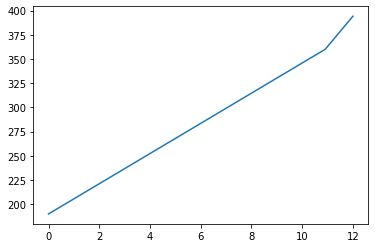

In [398]:
plt.plot(xs, df_curve_example2['Energy_tot'])

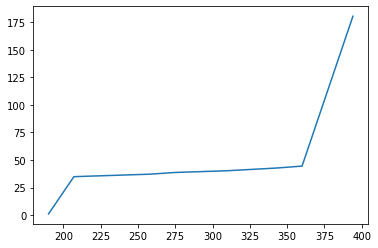

In [399]:
plt.plot(df_curve_example2['Energy_tot'],df_curve_example2['Price'])

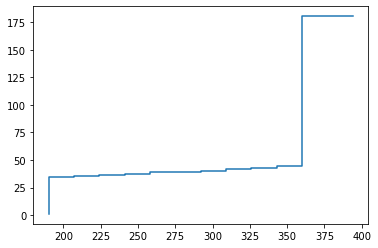

In [400]:
plt.step(df_curve_example2['Energy_tot'],df_curve_example2['Price'], label='pre (default)')

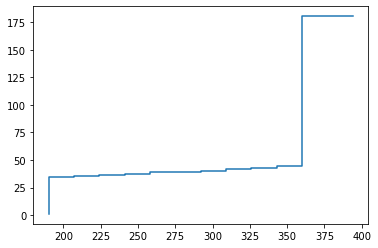

In [401]:
plt.plot(df_curve_example2['Energy_tot'],
         df_curve_example2['Price'], 
         drawstyle='steps', label='steps (=steps-pre)')

In [402]:
#Function to plot bid curves for a chosen date and period (hour)

def plot_bid_curve(date, period):
    df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) & 
                                                (df_curve['Period'] == period)]
   
    return plt.plot(df_plot['Energy_tot'], df_plot['Price'], drawstyle='steps', label='steps (=steps-pre)')

#The first step should be included

<ipython-input-402-ece397bd5943>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


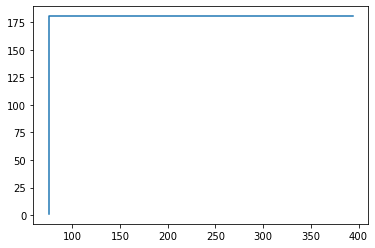

In [403]:
plot_bid_curve('2020-8-25',4)

<ipython-input-402-ece397bd5943>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


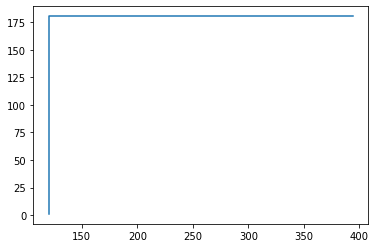

In [404]:
plot_bid_curve('2020-8-25',5)

<ipython-input-402-ece397bd5943>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


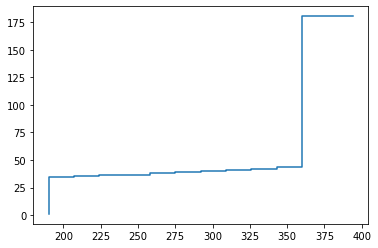

In [405]:
plot_bid_curve('2020-8-25',18)

In [406]:
#It seems that energy blocks are equal for the hole year.

### TRYING TO COMPLETE ALL PERIODS WITH 12 BLOCKS

In [407]:
#Checking blocks for one day

df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-22') & 
                                                (df_curve['Period']==9)]

<ipython-input-407-c892746408ab>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-22') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
59056,394.10,2020,10,22,9,1,1.13,190.00,2020-10-22,Thursday,190.00
59057,394.10,2020,10,22,9,2,35.34,17.00,2020-10-22,Thursday,207.00
59058,394.10,2020,10,22,9,3,36.11,17.00,2020-10-22,Thursday,224.00
59059,394.10,2020,10,22,9,4,36.87,17.00,2020-10-22,Thursday,241.00
59060,394.10,2020,10,22,9,5,37.64,14.00,2020-10-22,Thursday,255.00
59061,394.10,2020,10,22,9,12,180.30,139.10,2020-10-22,Thursday,394.10


In [408]:
type(df_curve.groupby(['Month','Day','Period'])['Block'].count())

pandas.core.series.Series

In [409]:
df_curve.groupby(['Month','Day','Period'])['Block'].count()

Month  Day  Period
1      1    1          1
            2          1
            3          2
            4          2
            5          2
                      ..
12     31   20        12
            21        12
            22        12
            23        12
            24        12
Name: Block, Length: 8480, dtype: int64

In [410]:
df_curve.groupby(['Month','Day','Period'])['Block'].count().value_counts()

12    5370
2     1745
1     1016
6      274
7       74
4        1
Name: Block, dtype: int64

In [411]:
len(df_curve.groupby(['Month','Day','Period'])['Block'].count())

8480

In [412]:
df_curve.groupby(['Month','Day','Period'])['Block'].count().value_counts().sum()

8480

In [413]:
len(df_curve)

71112

In [414]:
df_curve[['Month','Day','Block']].groupby(['Block']).count()

,Month,Day
Block,,
1,7464,7464
2,5719,5719
3,5719,5719
4,5718,5718
5,5718,5718
6,5444,5444
7,5370,5370
8,5370,5370
9,5370,5370


In [415]:
df_curve[['Month','Day','Block']].groupby(['Block']).count().sum()

Month    71112
Day      71112
dtype: int64

In [416]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday,394.10
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday,394.10
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday,50.00
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday,394.10
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday,60.00


In [417]:
########## FIST APPROACHES ########################

#First idea was to create a blank structure with Year, Month, Day, Period and all Blocks (12) following the 
#original structure in df_curve. With this structure, multiindex and using "reset_index_like",
#the original dataframe is modify with NaN.

In [418]:
y_min = df_curve['Year'].min()
y_max = df_curve['Year'].max()
y_min, y_max 

(2019, 2020)

In [419]:
year = 2020
m_min = df_curve[df_curve['Year']==year]['Month'].min()
m_max = df_curve[df_curve['Year']==year]['Month'].max()
m_min, m_max

(1, 10)

In [420]:
year = 2020
month = 2
d_min = df_curve[(df_curve['Year']==year)&(df_curve['Month']==month)]['Day'].min()
d_max = df_curve[(df_curve['Year']==year)&(df_curve['Month']==month)]['Day'].max()
d_min, d_max

(1, 29)

In [421]:
year = 2019
month = 10
day = 25
p_min = df_curve[(df_curve['Year']==year)&(df_curve['Month']==month)&(df_curve['Day']==day)]['Period'].min()
p_max = df_curve[(df_curve['Year']==year)&(df_curve['Month']==month)&(df_curve['Day']==day)]['Period'].max()
p_min, p_max

(nan, nan)

In [422]:
year = 2020
month = 10
day = 25
p_min = df_curve[(df_curve['Year']==year)&(df_curve['Month']==month)&(df_curve['Day']==day)]['Period'].min()
p_max = df_curve[(df_curve['Year']==year)&(df_curve['Month']==month)&(df_curve['Day']==day)]['Period'].max()
p_min, p_max

(1, 25)

In [423]:
year = 2020
month = 3
day = 29
p_min = df_curve[(df_curve['Year']==year)&(df_curve['Month']==month)&(df_curve['Day']==day)]['Period'].min()
p_max = df_curve[(df_curve['Year']==year)&(df_curve['Month']==month)&(df_curve['Day']==day)]['Period'].max()
p_min, p_max

(1, 23)

In [424]:
type(p_max)

int

In [425]:
#Number rows when Blocks are completed
len(df_curve[df_curve['Block']==12])*12

101760

In [426]:
#Current number of rows
len(df_curve)

71112

In [427]:
#Difference between current number of rows and complete number of rows
diff = len(df_curve[df_curve['Block']==12])*12 - len(df_curve)
diff

30648

In [428]:
num_periods = len(df_curve[df_curve['Block']==12])
num_periods

8480

In [429]:
#Media of missing blocks per period

diff/num_periods

3.6141509433962264

In [430]:
############# DELETE IF THE OTHER CELLS WORK #######################


#Trying to create the DataFrame structure for Month, Day, Period and Block

df_empty = pd.DataFrame([], columns=['Year','Month','Day'])

i = 0

y_min = df_curve['Year'].min()
y_max = df_curve['Year'].max()


for yx in range(y_min,y_max+1):
    
    m_min = df_curve[df_curve['Year']==yx]['Month'].min()
    m_max = df_curve[df_curve['Year']==yx]['Month'].max()
    
    for mx in range(m_min, m_max+1): 
        
        d_min = df_curve[(df_curve['Year']==yx)&
                         (df_curve['Month']==mx)]['Day'].min()
        d_max = df_curve[(df_curve['Year']==yx)&
                         (df_curve['Month']==mx)]['Day'].max()
        
        for dx in range(d_min, d_max+1):
            
            p_min = df_curve[(df_curve['Year']==yx)&
                             (df_curve['Month']==mx)&
                             (df_curve['Day']==dx)]['Period'].min()
            p_max = df_curve[(df_curve['Year']==yx)&
                             (df_curve['Month']==mx)&
                             (df_curve['Day']==dx)]['Period'].max()
            
            #For some reason I do not understand p_max is a float NaN and the rest of the code do not work
            
            #for px in range(1, 24):
            i += 1
            df_empty = df_empty.append({'Year': yx, 'Month': mx, 'Day': dx}, ignore_index=True)
            
df_empty.head()

,Year,Month,Day
0,2019,11,1
1,2019,11,2
2,2019,11,3
3,2019,11,4
4,2019,11,5


In [431]:
len(df_empty)

366

In [432]:
df_empty.groupby(['Year','Month']).count()

Day
Year Month     
2019 11      30
     12      31
2020 1       31
     2       29
     3       31
     4       30
     5       31
     6       30
     7       31
     8       31
     9       30
     10      31

In [433]:
df_curve.groupby(['Year','Month','Day','Period'])['Block'].sum()

Year  Month  Day  Period
2019  11     1    1         12
                  2         12
                  3         13
                  4         13
                  5         13
                            ..
2020  10     31   20        78
                  21        78
                  22        78
                  23        78
                  24        78
Name: Block, Length: 8480, dtype: int64

In [434]:
#FIRST APPROACH WILL BE DELETED

In [435]:
############   NEW APPROACH  ##########################
#The new idea consists in creating a df structure for 1 Block and then copy this new df, changing the number 
#of Block and appending it to the original. Doing it 12 times, we have the correct structure of the df.

In [436]:
df_block = df_curve.groupby(['Year','Month','Day','Period'])['Block'].sum().reset_index()
df_block

,Year,Month,Day,Period,Block
0,2019,11,1,1,12
1,2019,11,1,2,12
2,2019,11,1,3,13
3,2019,11,1,4,13
4,2019,11,1,5,13
...,...,...,...,...,...
8475,2020,10,31,20,78
8476,2020,10,31,21,78
8477,2020,10,31,22,78
8478,2020,10,31,23,78


In [437]:
#Number of row that should have the new dataframe.

8480*12

101760

In [438]:
#Changing the value of all Blocks to 1
df_block['Block'] = 1

In [439]:
df_block.head()

,Year,Month,Day,Period,Block
0,2019,11,1,1,1
1,2019,11,1,2,1
2,2019,11,1,3,1
3,2019,11,1,4,1
4,2019,11,1,5,1


In [440]:
#Creating a new dataframe with the same structure for all Blocks

df_block_tot = pd.DataFrame()

for block in range(1,13):
    df_block_new = df_block.copy()
    df_block_new['Block'] = block
    df_block_tot = pd.concat([df_block_tot,df_block_new])

In [441]:
df_block_tot

,Year,Month,Day,Period,Block
0,2019,11,1,1,1
1,2019,11,1,2,1
2,2019,11,1,3,1
3,2019,11,1,4,1
4,2019,11,1,5,1
...,...,...,...,...,...
8475,2020,10,31,20,12
8476,2020,10,31,21,12
8477,2020,10,31,22,12
8478,2020,10,31,23,12


In [442]:
df_block_tot.reset_index(inplace=True)

In [443]:
df_block_tot

,index,Year,Month,Day,Period,Block
0,0,2019,11,1,1,1
1,1,2019,11,1,2,1
2,2,2019,11,1,3,1
3,3,2019,11,1,4,1
4,4,2019,11,1,5,1
...,...,...,...,...,...,...
101755,8475,2020,10,31,20,12
101756,8476,2020,10,31,21,12
101757,8477,2020,10,31,22,12
101758,8478,2020,10,31,23,12


In [444]:
len(df_block_tot) == 8480*12

True

In [445]:
#Now the complet dataframe is created by merging the original df (df_curve) with the new structure dataframe 
#created (df_block_tot)

df_tot = df_curve.merge(df_block_tot,how='outer')

In [446]:
df_tot

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,index
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday,394.10,1160
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday,394.10,1161
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday,50.00,1162
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday,394.10,1162
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday,60.00,1163
...,...,...,...,...,...,...,...,...,...,...,...,...
101755,nan,2020,10,31,5,11,nan,nan,NaT,NaN,nan,8460
101756,nan,2020,10,31,6,11,nan,nan,NaT,NaN,nan,8461
101757,nan,2020,10,31,7,11,nan,nan,NaT,NaN,nan,8462
101758,nan,2020,10,31,8,11,nan,nan,NaT,NaN,nan,8463


In [447]:
#New dataframe is sorted and reseted index
df_tot = df_tot.sort_values(['Year','Month','Day','Period','Block']).reset_index()
df_tot

,level_0,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot,index
0,71112,nan,2019,11,1,1,1,nan,nan,NaT,NaN,nan,0
1,72128,nan,2019,11,1,1,2,nan,nan,NaT,NaN,nan,0
2,74889,nan,2019,11,1,1,3,nan,nan,NaT,NaN,nan,0
3,77650,nan,2019,11,1,1,4,nan,nan,NaT,NaN,nan,0
4,80412,nan,2019,11,1,1,5,nan,nan,NaT,NaN,nan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101755,61040,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday,309.00,8479
101756,61041,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday,326.00,8479
101757,61042,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday,343.00,8479
101758,61043,394.10,2020,10,31,24,11,44.48,17.00,2020-10-31,Saturday,360.00,8479


In [448]:
df_tot.drop(['level_0','index'],axis=1,inplace=True)

In [449]:
df_tot

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,nan,2019,11,1,1,1,nan,nan,NaT,NaN,nan
1,nan,2019,11,1,1,2,nan,nan,NaT,NaN,nan
2,nan,2019,11,1,1,3,nan,nan,NaT,NaN,nan
3,nan,2019,11,1,1,4,nan,nan,NaT,NaN,nan
4,nan,2019,11,1,1,5,nan,nan,NaT,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...
101755,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday,309.00
101756,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday,326.00
101757,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday,343.00
101758,394.10,2020,10,31,24,11,44.48,17.00,2020-10-31,Saturday,360.00


In [450]:
#As the structrue dataframe has more rows that the original, a lot of NaN have been created.
#These NaN must be filled.

In [451]:
#As Block 12 is always filled in the original dataframe and dataframe is sorted by 'Block', bfill is the
#right method to fill NaN since the meaning of no Block in OMIE curve is a fixed Price.
df_tot['Price'].fillna(method='bfill',inplace=True)

In [452]:
#Pot_max is allways the same value
df_tot['Pot_max'].fillna(df_tot['Pot_max'].max(),inplace=True)

In [454]:
#For the same reason of Price, Weekday is filled with bfill method
df_tot['Weekday'].fillna(method='bfill',inplace=True)

In [455]:
#For the same reason of Price, Datw is filled with bfill method
df_tot['Date'].fillna(method='bfill',inplace=True)

In [457]:
#Energy NaN will be filled with 0 since allways Energy of Block 12 must be Pot_max (394.1)
df_tot['Energy'].fillna(float(0),inplace=True)

In [458]:
df_tot

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2019,11,1,1,1,180.30,0.00,2019-11-01,Friday,nan
1,394.10,2019,11,1,1,2,180.30,0.00,2019-11-01,Friday,nan
2,394.10,2019,11,1,1,3,180.30,0.00,2019-11-01,Friday,nan
3,394.10,2019,11,1,1,4,180.30,0.00,2019-11-01,Friday,nan
4,394.10,2019,11,1,1,5,180.30,0.00,2019-11-01,Friday,nan
...,...,...,...,...,...,...,...,...,...,...,...
101755,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday,309.00
101756,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday,326.00
101757,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday,343.00
101758,394.10,2020,10,31,24,11,44.48,17.00,2020-10-31,Saturday,360.00


In [459]:
#Now only Energy_tot columns have NaN
#NaN in Energy_tot can be filled by interpolation method, but first of all a value must be included
#in all cells with Block ==1, since it is necessary 2 values in each Period to be able to interpolate
#and it is the only way to fill NaN in all Periods with only one Block (12)

In [460]:
#Problem with Periods with only Block 12
df_tot['Energy_tot'].interpolate()

0           nan
1           nan
2           nan
3           nan
4           nan
          ...  
101755   309.00
101756   326.00
101757   343.00
101758   360.00
101759   394.10
Name: Energy_tot, Length: 101760, dtype: float64

In [461]:
df_tot.iloc[:50]

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2019,11,1,1,1,180.30,0.00,2019-11-01,Friday,nan
1,394.10,2019,11,1,1,2,180.30,0.00,2019-11-01,Friday,nan
2,394.10,2019,11,1,1,3,180.30,0.00,2019-11-01,Friday,nan
3,394.10,2019,11,1,1,4,180.30,0.00,2019-11-01,Friday,nan
4,394.10,2019,11,1,1,5,180.30,0.00,2019-11-01,Friday,nan
5,394.10,2019,11,1,1,6,180.30,0.00,2019-11-01,Friday,nan
6,394.10,2019,11,1,1,7,180.30,0.00,2019-11-01,Friday,nan
7,394.10,2019,11,1,1,8,180.30,0.00,2019-11-01,Friday,nan
8,394.10,2019,11,1,1,9,180.30,0.00,2019-11-01,Friday,nan
9,394.10,2019,11,1,1,10,180.30,0.00,2019-11-01,Friday,nan


In [462]:
#Minimum value in Energy_tot column
df_tot['Energy_tot'].min()

50.0

In [464]:
#We will replace only NaN in Energy_tot for Block = 1 with 50 (min)

In [466]:
df_tot['Energy_tot'][df_tot['Block']==1]

0           nan
12          nan
24        50.00
36        60.00
48        60.00
          ...  
101700   190.00
101712   190.00
101724   190.00
101736   190.00
101748   190.00
Name: Energy_tot, Length: 8480, dtype: float64

In [467]:
#Filling Energy_tot NaN for Block=1 with 50

df_tot['Energy_tot'][(df_tot['Block']==1) & (df_tot['Energy_tot'].isnull())] = df_tot['Energy_tot'].min()

<ipython-input-467-d5acf402ac9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tot['Energy_tot'][(df_tot['Block']==1) & (df_tot['Energy_tot'].isnull())] = df_tot['Energy_tot'].min()


In [468]:
df_tot

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2019,11,1,1,1,180.30,0.00,2019-11-01,Friday,50.00
1,394.10,2019,11,1,1,2,180.30,0.00,2019-11-01,Friday,nan
2,394.10,2019,11,1,1,3,180.30,0.00,2019-11-01,Friday,nan
3,394.10,2019,11,1,1,4,180.30,0.00,2019-11-01,Friday,nan
4,394.10,2019,11,1,1,5,180.30,0.00,2019-11-01,Friday,nan
...,...,...,...,...,...,...,...,...,...,...,...
101755,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday,309.00
101756,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday,326.00
101757,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday,343.00
101758,394.10,2020,10,31,24,11,44.48,17.00,2020-10-31,Saturday,360.00


In [469]:
#Cheching that everything is OK between original dataframe and new one

df_curve[['Block','Energy_tot']] [df_curve['Block']==1].value_counts()

Block  Energy_tot
1      190.00        5719
       120.00        1096
       75.00          274
       60.00          221
       50.00           75
       70.00           73
       102.00           3
       145.00           1
       65.00            1
       55.00            1
dtype: int64

In [470]:
df_tot[['Block','Energy_tot']] [df_tot['Block']==1].value_counts()

Block  Energy_tot
1      190.00        5719
       120.00        1096
       50.00         1091
       75.00          274
       60.00          221
       70.00           73
       102.00           3
       145.00           1
       65.00            1
       55.00            1
dtype: int64

In [471]:
#It is OK since the only modification is 50 that goes from 75 to 1091

In [472]:
df_tot

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2019,11,1,1,1,180.30,0.00,2019-11-01,Friday,50.00
1,394.10,2019,11,1,1,2,180.30,0.00,2019-11-01,Friday,nan
2,394.10,2019,11,1,1,3,180.30,0.00,2019-11-01,Friday,nan
3,394.10,2019,11,1,1,4,180.30,0.00,2019-11-01,Friday,nan
4,394.10,2019,11,1,1,5,180.30,0.00,2019-11-01,Friday,nan
...,...,...,...,...,...,...,...,...,...,...,...
101755,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday,309.00
101756,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday,326.00
101757,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday,343.00
101758,394.10,2020,10,31,24,11,44.48,17.00,2020-10-31,Saturday,360.00


In [473]:
df_tot[df_tot['Block']==1]

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2019,11,1,1,1,180.30,0.00,2019-11-01,Friday,50.00
12,394.10,2019,11,1,2,1,180.30,0.00,2019-11-01,Friday,50.00
24,394.10,2019,11,1,3,1,1.13,50.00,2019-11-01,Friday,50.00
36,394.10,2019,11,1,4,1,1.13,60.00,2019-11-01,Friday,60.00
48,394.10,2019,11,1,5,1,1.13,60.00,2019-11-01,Friday,60.00
...,...,...,...,...,...,...,...,...,...,...,...
101700,394.10,2020,10,31,20,1,1.13,190.00,2020-10-31,Saturday,190.00
101712,394.10,2020,10,31,21,1,1.13,190.00,2020-10-31,Saturday,190.00
101724,394.10,2020,10,31,22,1,1.13,190.00,2020-10-31,Saturday,190.00
101736,394.10,2020,10,31,23,1,1.13,190.00,2020-10-31,Saturday,190.00


In [474]:
#Now remaining NaN in Energy_tot are filled by interpolation 

df_tot['Energy_tot'].interpolate(inplace=True)

In [475]:
df_tot.head(20)

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2019,11,1,1,1,180.30,0.00,2019-11-01,Friday,50.00
1,394.10,2019,11,1,1,2,180.30,0.00,2019-11-01,Friday,81.28
2,394.10,2019,11,1,1,3,180.30,0.00,2019-11-01,Friday,112.56
3,394.10,2019,11,1,1,4,180.30,0.00,2019-11-01,Friday,143.85
4,394.10,2019,11,1,1,5,180.30,0.00,2019-11-01,Friday,175.13
5,394.10,2019,11,1,1,6,180.30,0.00,2019-11-01,Friday,206.41
6,394.10,2019,11,1,1,7,180.30,0.00,2019-11-01,Friday,237.69
7,394.10,2019,11,1,1,8,180.30,0.00,2019-11-01,Friday,268.97
8,394.10,2019,11,1,1,9,180.30,0.00,2019-11-01,Friday,300.25
9,394.10,2019,11,1,1,10,180.30,0.00,2019-11-01,Friday,331.54


In [486]:
df_tot

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2019,11,1,1,1,180.30,0.00,2019-11-01,Friday,50.00
1,394.10,2019,11,1,1,2,180.30,0.00,2019-11-01,Friday,81.28
2,394.10,2019,11,1,1,3,180.30,0.00,2019-11-01,Friday,112.56
3,394.10,2019,11,1,1,4,180.30,0.00,2019-11-01,Friday,143.85
4,394.10,2019,11,1,1,5,180.30,0.00,2019-11-01,Friday,175.13
...,...,...,...,...,...,...,...,...,...,...,...
101755,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday,309.00
101756,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday,326.00
101757,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday,343.00
101758,394.10,2020,10,31,24,11,44.48,17.00,2020-10-31,Saturday,360.00


In [488]:
df_tot.shape

(101760, 11)

## CREATING A MVP CONSIDERING ONLY PRICE AS TARGET

### CREATING THE DATASET TO USE THE MODELS

First of all, a dataframe for using different kind of models are created.

The first choice is to use only Month, Day, Period, Block, Energy, Price. As Energy seems to be almost equal all the time, the first models will use Energy as feature. Future models will use Energy also as target.

In [44]:
df.head()

,Bid_Code,Num_Version,Bid_Unit,Unit_Description,Sell_Buy,Pot_max,Year,Month,Day,Period,Block,Price,Energy
0,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,1,12,180.30,394.10
1,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,2,12,180.30,394.10
2,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,3,1,1.13,50.00
3,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,3,12,180.30,344.10
4,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,4,1,1.13,60.00


In [45]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday,394.10
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday,394.10
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday,50.00
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday,394.10
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday,60.00


In [489]:
df_tot.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2019,11,1,1,1,180.30,0.00,2019-11-01,Friday,50.00
1,394.10,2019,11,1,1,2,180.30,0.00,2019-11-01,Friday,81.28
2,394.10,2019,11,1,1,3,180.30,0.00,2019-11-01,Friday,112.56
3,394.10,2019,11,1,1,4,180.30,0.00,2019-11-01,Friday,143.85
4,394.10,2019,11,1,1,5,180.30,0.00,2019-11-01,Friday,175.13


### FIRST MODEL

The first set of models will be created considering "One Hot Encoding" for categorical variables dropping the first variable and Standirizing by the maximum the remaining variable.

The second set of models will be built without dropping the first variable in One Hot Encoding

In [46]:
#Most of the variables are categorical:Month, Day, Period, Weekday and Block.
#Only Energy_tot is not categorical.
#One-hot encoding will be used to convert variables from categorical to binary.

from sklearn.preprocessing import OneHotEncoder

df_curve_cat = df_curve[['Month','Day','Period','Weekday','Block']]

In [47]:
one_encoder = OneHotEncoder(drop=None, sparse=False) #Changing 'first' with 'None'
one_encoder.fit(df_curve_cat)

OneHotEncoder(sparse=False)

In [48]:
df_curve_cat_onehot = one_encoder.transform(df_curve_cat)

In [49]:
df_curve_cat_onehot

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [50]:
type(df_curve['Energy_tot'].max())

float

In [51]:
#Energy is normalize with the maximum

from numpy import asarray

df_curve_energy = np.asarray(df_curve[['Energy_tot']]/df_curve['Energy_tot'].max())
df_curve_energy

array([[1.        ],
       [1.        ],
       [0.12687135],
       ...,
       [0.87033748],
       [0.91347374],
       [1.        ]])

In [52]:
df_curve_cat_onehot.shape, df_curve_energy.shape

((71112, 87), (71112, 1))

In [53]:
df_curve_energy.shape

(71112, 1)

In [54]:
X = np.concatenate((df_curve_cat_onehot, df_curve_energy), axis=1)

In [55]:
X.shape

(71112, 88)

In [56]:
y = np.asarray(df_curve['Price'])

In [57]:
y.shape

(71112,)

In [58]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [59]:
#Splitting Test set and Train set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## REGRESSION MODELS

In [61]:
## LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#Creation of a model instance 
reg_linear = LinearRegression()

reg_linear.fit(X_train,y_train)


LinearRegression()

In [62]:
y_pred_linear = reg_linear.predict(X_test)

In [63]:
reg_linear.coef_

array([-9.98463005e+10, -9.98463005e+10, -9.98463005e+10, -9.98463005e+10,
       -9.98463005e+10, -9.98463005e+10, -9.98463005e+10, -9.98463005e+10,
       -9.98463005e+10, -9.98463005e+10, -9.98463005e+10, -9.98463005e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  7.92298277e+10,
        7.92298277e+10,  7.92298277e+10,  7.92298277e+10,  9.67738097e+12,
        9.67738097e+12,  9.67738097e+12,  9.67738097e+12,  9.67738097e+12,
        9.67738097e+12,  9.67738097e+12,  9.67738097e+12,  9.67738097e+12,
        9.67738097e+12,  

In [64]:
#MAE metric
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred_linear) # Primero valor real y luego prediccion

1.9946090399353158

In [147]:
## K-NEIGHBORS REGRESSION

#from sklearn.neighbors import KNeighborsRegressor

In [150]:
#reg_kneig = KNeighborsRegressor(n_neighbors=10)

#reg_kneig.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=10)

In [151]:
#y_pred_kneig = reg_kneig.predict(X_test)


In [152]:
# MAE
#mean_absolute_error(y_test,y_pred_kneig)

0.3730708008155806

In [68]:
# RMSE from linear regression

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred_linear))

2.9004693431312716

In [154]:
# RMSE: k Nei
#np.sqrt(mean_squared_error(y_test,y_pred_kneig))

0.7570955998489847

In [72]:


## X-validation for linear regression

from sklearn.model_selection import cross_val_score

#X-val for LINEAR REGRESSION
#cv=5 (by default)

cross_val_score(reg_linear,X,y,scoring="neg_mean_absolute_error")

array([-6.93247864e+11, -1.35685522e+11, -6.03775018e+11, -6.85291436e+11,
       -1.25108025e+12])

In [156]:
#NO ENTIENDO QUÉ ESTÁ PASANDO AQUÍ... ¿CÓMO ES POSIBLE QUE PRIMERO SALGA DEL ORDEN DE 2 Y LUEGO DEL ORDEN DE 2e12?

In [80]:
cross_val_score(reg_linear,X,y,scoring="neg_mean_absolute_error").mean()

-673816018121.8248

In [158]:
#X-val for K-NEIGHBORS
#cross_val_score(reg_kneig,X,y,scoring="neg_mean_absolute_error")

array([-4.98565275, -3.93704078, -3.59623646, -1.19427415, -3.42797405])

In [159]:
#############################################################################################################

In [160]:
#Examples of real and predition curves will be ploted to compare them.

<ipython-input-38-ece397bd5943>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


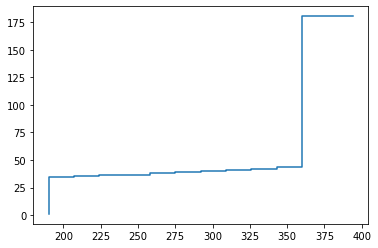

In [81]:
plot_bid_curve('2020-8-16',18)

In [82]:
example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-08-16') & 
                                                (df_curve['Period']==18)]
example

<ipython-input-82-38a5e932a7bf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-08-16') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
45825,394.10,2020,8,16,18,1,1.13,190.00,2020-08-16,Sunday,190.00
45826,394.10,2020,8,16,18,2,34.48,17.00,2020-08-16,Sunday,207.00
45827,394.10,2020,8,16,18,3,35.22,17.00,2020-08-16,Sunday,224.00
45828,394.10,2020,8,16,18,4,35.97,17.00,2020-08-16,Sunday,241.00
45829,394.10,2020,8,16,18,5,36.72,17.00,2020-08-16,Sunday,258.00
45830,394.10,2020,8,16,18,6,38.26,17.00,2020-08-16,Sunday,275.00
45831,394.10,2020,8,16,18,7,39.01,17.00,2020-08-16,Sunday,292.00
45832,394.10,2020,8,16,18,8,39.76,17.00,2020-08-16,Sunday,309.00
45833,394.10,2020,8,16,18,9,41.00,17.00,2020-08-16,Sunday,326.00
45834,394.10,2020,8,16,18,10,42.25,17.00,2020-08-16,Sunday,343.00


In [83]:
example_cat = example[['Month','Day','Period','Weekday','Block']]
example_cat

,Month,Day,Period,Weekday,Block
45825,8,16,18,Sunday,1
45826,8,16,18,Sunday,2
45827,8,16,18,Sunday,3
45828,8,16,18,Sunday,4
45829,8,16,18,Sunday,5
45830,8,16,18,Sunday,6
45831,8,16,18,Sunday,7
45832,8,16,18,Sunday,8
45833,8,16,18,Sunday,9
45834,8,16,18,Sunday,10


In [84]:
# example transformation to predict only this sample.
example_cat_onehot = one_encoder.transform(example_cat)
example_cat_onehot.shape

(12, 87)

In [85]:
example_cat_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [86]:
example_energy = np.asarray(example[['Energy_tot']]/example['Energy_tot'].max())
example_energy

array([[0.48211114],
       [0.5252474 ],
       [0.56838366],
       [0.61151992],
       [0.65465618],
       [0.69779244],
       [0.7409287 ],
       [0.78406496],
       [0.82720122],
       [0.87033748],
       [0.91347374],
       [1.        ]])

In [87]:
example_X = np.concatenate((example_cat_onehot, example_energy), axis=1)

In [88]:
example_y = np.asarray(example['Price'])

In [89]:
#Example with linear regression

example_y_pred_linear = reg_linear.predict(example_X)

In [90]:
example_y_pred_linear

array([ -0.2421875 ,  34.015625  ,  34.9140625 ,  35.8203125 ,
        36.7109375 ,  38.0234375 ,  38.91796875,  39.77734375,
        40.96875   ,  42.2265625 ,  43.78125   , 178.84375   ])

In [91]:
example_y

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

<ipython-input-38-ece397bd5943>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


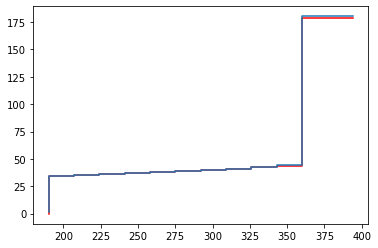

In [92]:
plt.plot(example['Energy_tot'], example_y_pred_linear, drawstyle='steps', label='steps (=steps-pre)', color='red')
plot_bid_curve('2020-8-16',18)

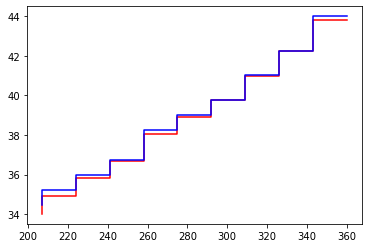

In [93]:
plt.plot(example['Energy_tot'][1:-1], example_y_pred_linear[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'][1:-1], example_y[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

In [95]:
#Example with k-neighbors regression

#example_y_pred_kneig = reg_kneig.predict(example_X)

In [96]:
#example_y_pred_kneig

In [97]:
example_y

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

In [98]:
#plt.plot(example['Energy_tot'], example_y_pred_kneig, drawstyle='steps', label='steps (=steps-pre)', color='red')
#plot_bid_curve('2020-8-16',18)

In [99]:
#plt.plot(example['Energy_tot'][1:-1], example_y_pred_kneig[1:-1], drawstyle='steps', 
#         label='steps (=steps-pre)', color='red')

#plt.plot(example['Energy_tot'][1:-1], example_y[1:-1], drawstyle='steps', 
#         label='steps (=steps-pre)', color='blue')

In [179]:
#Tiene pinta de que el primer precio es muy variable porque lo calcula muy mal. 
#Esto es debido a que no todas las segmentaciones de las horas son iguales por lo que ese primer valor puede no
#estar bien estimado. 
#POSIBLE ARREGLO: dividir todas las horas en un mismo número de bloques (12, por ejemplo), asignando un mismo
#valor de energía a todos los segmentos nuevos --> ¿relación con la predicción de dos variables?

In [180]:
##########################################################################################################


In [100]:
#DECISION TREES

from sklearn.tree import DecisionTreeRegressor

reg_dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

reg_dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [101]:
y_pred_dt = reg_dt.predict(X_test)

In [102]:
# MAE
mean_absolute_error(y_test,y_pred_dt)

2.894665914717577

In [103]:
# RMSE from decision trees

np.sqrt(mean_squared_error(y_test,y_pred_dt))

4.373318211757926

In [104]:
#Example with decision tree regression

example_y_pred_dt = reg_dt.predict(example_X)

In [105]:
example_y_pred_dt

array([  1.13      ,  40.84850377,  40.84850377,  40.84850377,
        40.84850377,  40.84850377,  40.84850377,  40.84850377,
        40.84850377,  40.84850377,  40.84850377, 180.3       ])

In [106]:
example_y

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

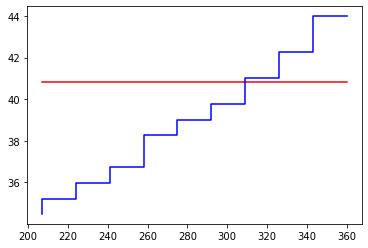

In [107]:
plt.plot(example['Energy_tot'][1:-1], example_y_pred_dt[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'][1:-1], example_y[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

In [108]:
#It seems that this decision tree is not good. In order to optimize the dt regression, GridSearchCV is tried.
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

reg_gdt = GridSearchCV(DecisionTreeRegressor(),
                      param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                      scoring="neg_mean_absolute_error")
reg_gdt.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='neg_mean_absolute_error')

In [109]:
reg_gdt.best_params_

{'max_depth': 10, 'min_samples_leaf': 10}

In [110]:
y_pred_gdt = reg_gdt.predict(X_test)

In [111]:
# MAE
mean_absolute_error(y_test,y_pred_gdt)

1.2024494040484845

In [112]:
# RMSE from decision trees

np.sqrt(mean_squared_error(y_test,y_pred_gdt))

2.2344272230350852

In [113]:
#Example with grid decision tree regression

example_y_pred_gdt = reg_gdt.predict(example_X)

In [114]:
example_y_pred_gdt

array([  1.13      ,  34.46063613,  35.20403423,  35.9445974 ,
        36.68439024,  38.22180556,  38.98059459,  39.73936   ,
        40.96344633,  44.63532702,  44.63532702, 180.3       ])

In [115]:
example_y

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

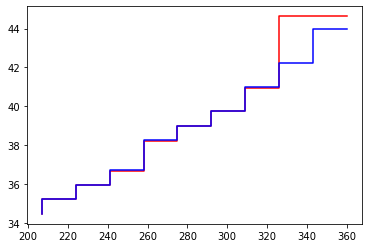

In [116]:
plt.plot(example['Energy_tot'][1:-1], example_y_pred_gdt[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'][1:-1], example_y[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

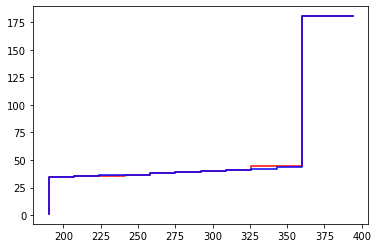

In [117]:
#We can observe that with dt first and last price are very good predicted

plt.plot(example['Energy_tot'], example_y_pred_gdt, drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'], example_y, drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

In [118]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=100)

reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [119]:
y_pred_ft = reg_rf.predict(X_test)

In [120]:
# MAE
mean_absolute_error(y_test,y_pred_ft)

0.0015079800331508967

In [121]:
# RMSE from random forest

np.sqrt(mean_squared_error(y_test,y_pred_ft))

0.029676476712297145

In [122]:
#Example with random forest regression

example_y_pred_rf = reg_rf.predict(example_X)

In [123]:
example_y_pred_rf

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

In [124]:
example_y

array([  1.13,  34.48,  35.22,  35.97,  36.72,  38.26,  39.01,  39.76,
        41.  ,  42.25,  43.99, 180.3 ])

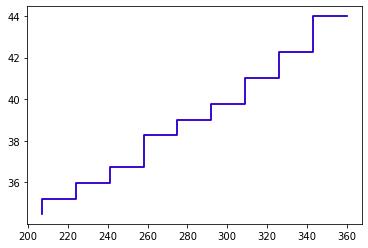

In [125]:
plt.plot(example['Energy_tot'][1:-1], example_y_pred_rf[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'][1:-1], example_y[1:-1], drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

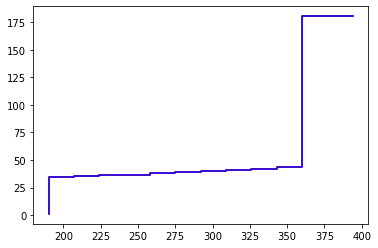

In [126]:
#We can observe that with dt first and last price are very good predicted

plt.plot(example['Energy_tot'], example_y_pred_rf, drawstyle='steps', 
         label='steps (=steps-pre)', color='red')

plt.plot(example['Energy_tot'], example_y, drawstyle='steps', 
         label='steps (=steps-pre)', color='blue')

In [127]:
#XG-BOOST

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
reg_XGB = GradientBoostingRegressor(max_depth=4, n_estimators=100,learning_rate=0.1)

In [60]:
reg_XGB.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4)

In [65]:
y_pred_XGB = reg_XGB.predict(X_test)

In [66]:
#MAE
mean_absolute_error(y_test,y_pred_XGB)

1.0194010218797669

In [69]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred_XGB))

1.549636993371683

In [73]:
cross_val_score(reg_XGB,X,y,scoring="neg_mean_absolute_error").mean()

-2.5924303014607193

In [128]:
from sklearn.model_selection import GridSearchCV

reg_XGB_CV = GridSearchCV(GradientBoostingRegressor(n_estimators=50),
                  param_grid={"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [129]:
reg_XGB_CV.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(n_estimators=50),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_absolute_error')

In [130]:
reg_XGB_CV.best_params_

{'learning_rate': 0.4, 'max_depth': 8}

In [131]:
y_pred_XGB_CV = reg_XGB_CV.predict(X_test)

In [132]:
# MAE
mean_absolute_error(y_test,y_pred_XGB_CV)

0.1027228501937115

In [133]:
# RMSE from random forest

np.sqrt(mean_squared_error(y_test,y_pred_XGB_CV))

0.1377227240423566